# Лабораторная работа  №1

# Решение краевых задач методом разностных аппроксимаций

Составить разностную схему и получить численное решение краевой задачи с точностью $10^{-3}$

$y(-1)=0, y(1) = 0$

In [16]:
import matplotlib.pyplot as plot
import numpy as np
from math import sin, cos, tan

## Задача 1

$y''+(1+x^2)y=-1, -1 \leq x \leq 1$

Частный случай линейной краевой задачи: $y''-p(x)y=f(x)$, где $p(x)=-(1+x^2)$, а $f(x)=-1$

In [17]:
def f(x):
    return -1

def p(x):
    return -(1 + x**2)

a = -1; b = 1; A = 0; B = 0

In [18]:
def get_h(n):
    return (b - a) / n

def get_x(n, h):
    return [a + k * h for k in range(n + 1)]

def get_system(n, h, x):
    matrix = [[0 for _ in range(n + 1)] for _ in range(n + 1)]
    matrix[0][0] = matrix[n][n] = 1
    for i in range(1, n):
        matrix[i][i - 1] = 1
        matrix[i][i] = -(2 + h**2 * p(x[i]))
        matrix[i][i + 1] = 1
    matrix = np.array(matrix)
    vector = [0 for _ in range(n + 1)]
    for i in range(1, n):
        vector[i] = h**2 * f(x[i])
    vector = np.array(vector)
    return matrix, vector

def solve_system(n):
    h = get_h(n)
    x = get_x(n, h)
    matrix, vector = get_system(n, h, x)
    y = list(np.linalg.solve(matrix, vector))
    return x, y

In [19]:
n = 4

In [20]:
x = []
y = []
x0, y0 = solve_system(n)
x1, y1 = solve_system(2*n)
while True:
    check = []
    for i in range(0, n):
        check.append(abs(y1[2*i] - y0[i]) < 0.001)
    n *= 2
    if all(check):
        break
    else:
        x.append(x0)
        y.append(y0)
        x0, y0 = x1, y1
        x1, y1 = solve_system(2*n)

In [21]:
f"Достигаем точности на {n} отрезках"

'Достигаем точности на 64 отрезках'

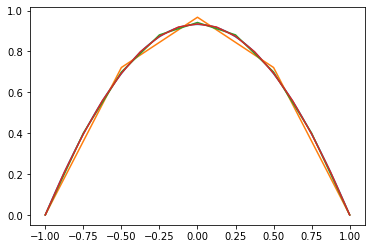

In [22]:
plot.plot(np.linspace(a, b, n + 1), y1)
for i, j in zip(x, y):
    plot.plot(np.linspace(a, b, len(i)), j)
plot.show()

In [23]:
f"Точность достигается при  y = {max(y1)}"

'Точность достигается при  y = 0.9322042384592342'

## Задача 2

$ay''+(1+bx^2)y=-1, -1 \leq x \leq 1$

Разделим всё на $sin(k)$ (где $k$ - номер варианта):

$ y''+(\dfrac{1}{sin(k)}+\dfrac{1}{tg(k)}x^2)y=\dfrac{-1}{sin(k)}, -1 \leq x \leq 1$

In [24]:
k = 6

In [25]:
def p(x):
    return -(1 / sin(k) + 1 / tan(k) * x**2)

def f(x):
    return -1 / sin(k)

In [26]:
n = 4

In [27]:
x = []
y = []
x0, y0 = solve_system(n)
x1, y1 = solve_system(2*n)
while True:
    check = []
    for i in range(0, n):
        check.append(abs(y1[2*i] - y0[i]) < 0.001)
    n *= 2
    if all(check):
        break
    else:
        x.append(x0)
        y.append(y0)
        x0, y0 = x1, y1
        x1, y1 = solve_system(2*n)

In [28]:
f"Достигаем точности на {n} отрезках"

'Достигаем точности на 32 отрезках'

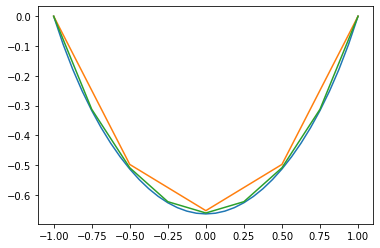

In [29]:
plot.plot(np.linspace(a, b, n + 1), y1)
for i, j in zip(x, y):
    plot.plot(np.linspace(a, b, len(i)), j)
plot.show()

In [30]:
f"Точность достигается при  y = {max(y1)}"

'Точность достигается при  y = 0.0'